A gaming company have been trying to create a persona based on their existing customers's features.By using these personas, they can be able to create segments, predict their new customers to belong to which segment and by using these segments, offering customize marketing strategies to them.

persona.csv
PRICE – Amount which customers spent 
SOURCE – The type of operationg systems 
SEX – The gender of the customer
COUNTRY – The country which customers are from
AGE- Age of the customers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#We can check our data set, looking at info, shape 
df=pd.read_csv("persona.csv")

In [3]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [4]:
df.shape

(5000, 5)

In [5]:
#There is no missing value in our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [6]:
#We can check the relationship between Source, Country, Gender, 
#Age with Price

df1= df.groupby("SOURCE").agg({"PRICE": "sum"})

In [7]:
df1.reset_index(inplace=True)

In [8]:
df1 # Android users are spending much more money on gaming.

,SOURCE,PRICE
0,android,101636
1,ios,69024


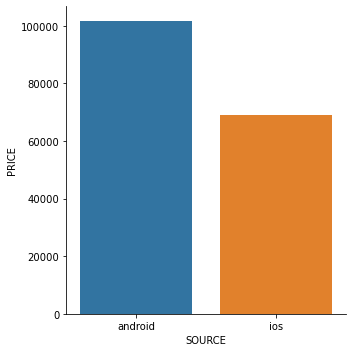

In [9]:
sns.catplot(data=df1, x="SOURCE", y="PRICE", kind="bar")

In [10]:
df2= df.groupby("SEX").agg({"PRICE": "sum"})

In [11]:
df2

,PRICE
SEX,
female,88989
male,81671


In [12]:
df2.reset_index(inplace=True)

In [13]:
df2 # Female users are spending much more money on gaming.

,SEX,PRICE
0,female,88989
1,male,81671


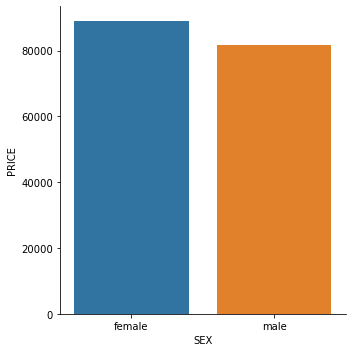

In [14]:
sns.catplot(data=df2, x="SEX", y="PRICE", kind="bar")

In [15]:
df3= df.groupby("COUNTRY",as_index=False).agg({"PRICE": "sum"})

In [16]:
df3.sort_values(by="PRICE", ascending=False)
#User from USA and BRA are spending more

,COUNTRY,PRICE
5,usa,70225
0,bra,51354
4,tur,15689
2,deu,15485
3,fra,10177
1,can,7730


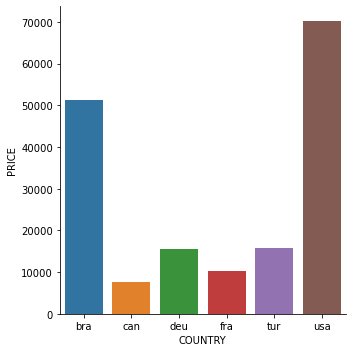

In [17]:
sns.catplot(data=df3, x="COUNTRY", y="PRICE", kind="bar")

In [18]:
df4= df.groupby("AGE",as_index=False).agg({"PRICE": "mean"})
df4.head()

,AGE,PRICE
0,15,34.817223
1,16,33.595142
2,17,35.066667
3,18,33.683908
4,19,34.631068


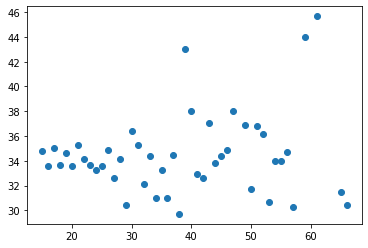

In [19]:
plt.scatter(x=df4["AGE"], y=df4["PRICE"])

In [20]:
#We can look at Source, Country, Price together.
#Android users from USA and BRA having more impact on gaming earnings of the 
#company
df5= df.groupby(["COUNTRY","SOURCE"],as_index=False).agg({"PRICE": "mean"})
df5

,COUNTRY,SOURCE,PRICE
0,bra,android,34.387029
1,bra,ios,34.222222
2,can,android,33.330709
3,can,ios,33.951456
4,deu,android,33.869888
5,deu,ios,34.268817
6,fra,android,34.312500
7,fra,ios,32.776224
8,tur,android,36.229437
9,tur,ios,33.272727


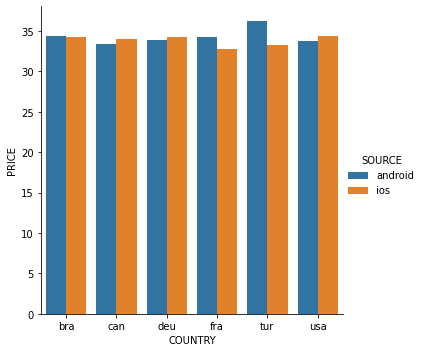

In [21]:
sns.catplot(data=df5, x="COUNTRY", y="PRICE", hue="SOURCE", kind="bar")

In [22]:
#We can add AGE feature

df6= df.groupby(["COUNTRY","SOURCE","SEX"],as_index=False).agg({"PRICE": "mean"})
df6.head()

,COUNTRY,SOURCE,SEX,PRICE
0,bra,android,female,34.684647
1,bra,android,male,34.084388
2,bra,ios,female,34.323194
3,bra,ios,male,34.126354
4,can,android,female,31.750000


In [23]:
df6["customer_source_sex"] = df6.apply(lambda x: x["SOURCE"].upper() + "_" + x["SEX"].upper(), axis=1)
df6.head()

,COUNTRY,SOURCE,SEX,PRICE,customer_source_sex
0,bra,android,female,34.684647,ANDROID_FEMALE
1,bra,android,male,34.084388,ANDROID_MALE
2,bra,ios,female,34.323194,IOS_FEMALE
3,bra,ios,male,34.126354,IOS_MALE
4,can,android,female,31.750000,ANDROID_FEMALE


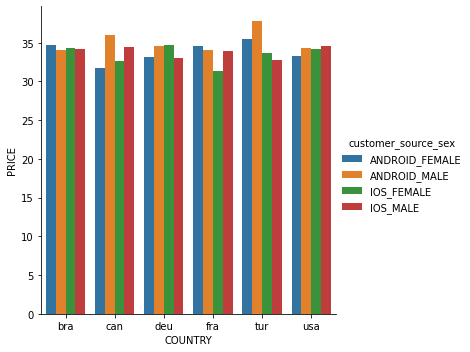

In [24]:
sns.catplot(data=df6, x="COUNTRY", y="PRICE", hue="customer_source_sex", kind="bar")

All countries except Germany, female and android users are spending more but in Germany, males-androids users are playing bigger role on earnings
of the company.

In [25]:
df7= df.groupby(["COUNTRY","SOURCE","SEX","AGE"],as_index=False).agg({"PRICE": "mean"})
df7.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,female,15,38.714286
1,bra,android,female,16,35.944444
2,bra,android,female,17,35.666667
3,bra,android,female,18,32.255814
4,bra,android,female,19,35.206897


In [26]:
df7["AGE_CAT"] = pd.cut(df7["AGE"], bins= [0,18,23,30,40,70,90], labels=["0_18","19_23","24_30","31_40","41_70","71_90"])
df7


,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,female,15,38.714286,0_18
1,bra,android,female,16,35.944444,0_18
2,bra,android,female,17,35.666667,0_18
3,bra,android,female,18,32.255814,0_18
4,bra,android,female,19,35.206897,19_23
...,...,...,...,...,...,...
343,usa,ios,male,42,30.250000,41_70
344,usa,ios,male,50,39.000000,41_70
345,usa,ios,male,53,34.000000,41_70
346,usa,ios,male,55,29.000000,41_70


In [27]:
#We can start creating personas
df7["customer_level_based"] = df7.apply(lambda x: x["COUNTRY"].upper() + "_" + x["SOURCE"].upper() + "_" + x["SEX"].upper() + "_" + x["AGE_CAT"], axis=1)
df7

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customer_level_based
0,bra,android,female,15,38.714286,0_18,BRA_ANDROID_FEMALE_0_18
1,bra,android,female,16,35.944444,0_18,BRA_ANDROID_FEMALE_0_18
2,bra,android,female,17,35.666667,0_18,BRA_ANDROID_FEMALE_0_18
3,bra,android,female,18,32.255814,0_18,BRA_ANDROID_FEMALE_0_18
4,bra,android,female,19,35.206897,19_23,BRA_ANDROID_FEMALE_19_23
...,...,...,...,...,...,...,...
343,usa,ios,male,42,30.250000,41_70,USA_IOS_MALE_41_70
344,usa,ios,male,50,39.000000,41_70,USA_IOS_MALE_41_70
345,usa,ios,male,53,34.000000,41_70,USA_IOS_MALE_41_70
346,usa,ios,male,55,29.000000,41_70,USA_IOS_MALE_41_70


In [28]:
df7.drop(["COUNTRY","SOURCE","SEX","AGE","AGE_CAT"], axis=1, inplace= True)
df7

,PRICE,customer_level_based
0,38.714286,BRA_ANDROID_FEMALE_0_18
1,35.944444,BRA_ANDROID_FEMALE_0_18
2,35.666667,BRA_ANDROID_FEMALE_0_18
3,32.255814,BRA_ANDROID_FEMALE_0_18
4,35.206897,BRA_ANDROID_FEMALE_19_23
...,...,...
343,30.250000,USA_IOS_MALE_41_70
344,39.000000,USA_IOS_MALE_41_70
345,34.000000,USA_IOS_MALE_41_70
346,29.000000,USA_IOS_MALE_41_70


In [30]:
df7["customer_level_based"].value_counts()

USA_ANDROID_MALE_24_30      7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_41_70      7
USA_IOS_FEMALE_24_30        7
BRA_ANDROID_MALE_24_30      7
                           ..
CAN_IOS_MALE_31_40          1
CAN_IOS_MALE_24_30          1
FRA_IOS_MALE_41_70          1
FRA_ANDROID_FEMALE_31_40    1
TUR_IOS_FEMALE_41_70        1
Name: customer_level_based, Length: 109, dtype: int64

In [33]:
df7=df7.groupby("customer_level_based",as_index=False).agg({"PRICE": "mean"})
df7
df7[df7["customer_level_based"]=="TUR_ANDROID_MALE_0_18"]


,customer_level_based,PRICE
74,TUR_ANDROID_MALE_0_18,39.873016


In [34]:
df7["SEGMENT"] = pd.qcut(df7["PRICE"], 4, labels = ["D", "C", "B", "A"])
df7


,customer_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,A
...,...,...,...
104,USA_IOS_MALE_0_18,33.983495,C
105,USA_IOS_MALE_19_23,34.901872,B
106,USA_IOS_MALE_24_30,34.838143,B
107,USA_IOS_MALE_31_40,36.206324,A


In [35]:
df7[df7["SEGMENT"]=="A"].head()

,customer_level_based,PRICE,SEGMENT
4,BRA_ANDROID_FEMALE_41_70,36.737179,A
9,BRA_ANDROID_MALE_41_70,40.041667,A
11,BRA_IOS_FEMALE_19_23,36.403846,A
25,CAN_ANDROID_MALE_19_23,40.111111,A
27,CAN_ANDROID_MALE_41_70,37.571429,A


#Now, we can predict new customer's segment 
Age:33,FEMALE ANDROID user from TUR, what is our expectation for earnings from this customer?


In [36]:
df7.loc[df7["customer_level_based"] == "TUR_ANDROID_FEMALE_31_40"]

,customer_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


Age:35,FEMALE IOS user from FRA, what is our expectation for earnings from this customer?

In [37]:
df7.loc[df7["customer_level_based"] == "FRA_IOS_FEMALE_31_40"]

,customer_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
